In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout


In [7]:

df = pd.read_csv("preprocessed_1m_0.5.csv", converters={"comment_text": lambda x: x.strip("[]").replace("'","").split(", "), "stemmed_text": lambda x: x.strip("[]").replace("'","").split(", ")})
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,stemmed_text
0,5525909,0.000000,"[really, fox, news, world, net, daily, rush, l...",0.000000,0.000000,0.000000,0.000000,0.0,approved,0,0,0,1,0,0.0,0,4,"[realli, fox, news, world, net, daili, rush, l..."
1,689647,0.000000,"[cheri, gofundme, set, yet, services, etc]",0.000000,0.000000,0.000000,0.000000,0.0,approved,0,0,0,3,0,0.0,0,4,"[cheri, gofundm, set, yet, servic, etc]"
2,825803,0.830508,"[trump, kgb, fsb, would, like, particularly, f...",0.084746,0.050847,0.016949,0.813559,0.0,approved,0,0,1,8,2,0.0,4,59,"[trump, kgb, fsb, would, like, particularli, f..."
3,5404446,0.000000,"[spot, would, add, feds, bring, something, tab...",0.000000,0.000000,0.000000,0.000000,0.0,approved,0,0,0,0,0,0.0,0,4,"[spot, would, add, fed, bring, someth, tabl, p..."
4,619755,0.000000,"[lean, governor, ige, dlnr, suzanne, case, ear...",0.000000,0.000000,0.000000,0.000000,0.0,approved,0,0,0,2,0,0.0,4,4,"[lean, governor, ige, dlnr, suzann, case, earl..."


In [8]:
drop_cols = [ 'severe_toxicity', 'obscene', "identity_attack", 'threat', 'insult', 'rating', "funny",	"wow",	"sad"	,"likes",	"disagree"	,"sexual_explicit"	,"identity_annotator_count",	"toxicity_annotator_count" ]
df = df.drop(drop_cols, axis=1)
df["label"]=df["target"].apply(lambda x: 1 if x>=0.5 else 0)
df.head()

,id,target,comment_text,stemmed_text,label
0,5525909,0.000000,"[really, fox, news, world, net, daily, rush, l...","[realli, fox, news, world, net, daili, rush, l...",0
1,689647,0.000000,"[cheri, gofundme, set, yet, services, etc]","[cheri, gofundm, set, yet, servic, etc]",0
2,825803,0.830508,"[trump, kgb, fsb, would, like, particularly, f...","[trump, kgb, fsb, would, like, particularli, f...",1
3,5404446,0.000000,"[spot, would, add, feds, bring, something, tab...","[spot, would, add, fed, bring, someth, tabl, p...",0
4,619755,0.000000,"[lean, governor, ige, dlnr, suzanne, case, ear...","[lean, governor, ige, dlnr, suzann, case, earl...",0


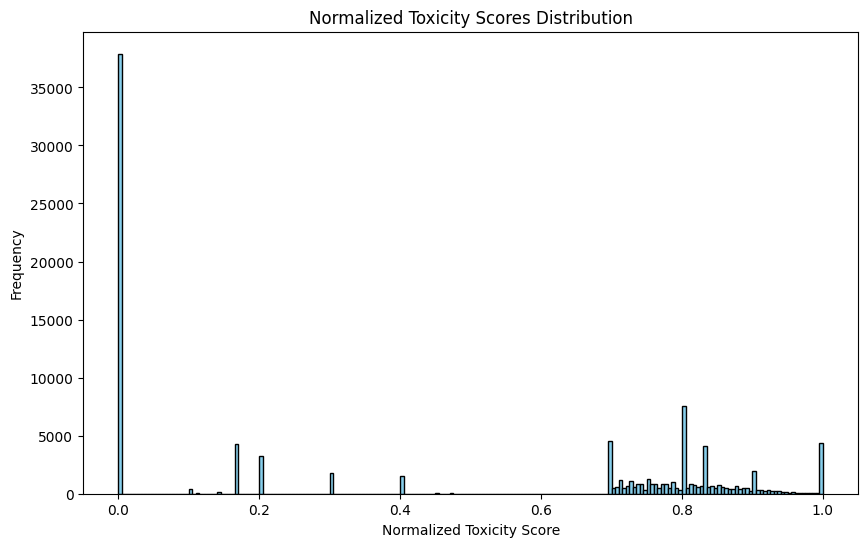

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['target'], bins=200, color='skyblue', edgecolor='black')
plt.title('Normalized Toxicity Scores Distribution')
plt.xlabel('Normalized Toxicity Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# # Assuming your data is in a DataFrame df with a column 'stemmed_text'
# all_words = [word for tokens in df['stemmed_text'] for word in tokens]
# vocab_size = len(set(all_words))
# # Assuming your data is in a DataFrame df with a column 'stemmed_text'
# max_seq_length = max(df['stemmed_text'].apply(len))
# sequence_length = max_seq_length
# embedding_dim = 100 

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Extract features and labels
# texts = df['stemmed_text'].astype(str)
# labels = df['label']

# # Use LabelEncoder to convert labels to numeric format (0 or 1)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(labels)

# # Tokenize the text data
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(texts)

# # Convert text to sequences
# sequences = tokenizer.texts_to_sequences(texts)

# # Pad sequences to a fixed length
# X = pad_sequences(sequences)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Check the shapes of your data
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)


X_train shape: (80000, 306)
y_train shape: (80000,)
X_test shape: (20000, 306)
y_test shape: (20000,)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming df is your DataFrame
texts = df['stemmed_text'].astype(str)
labels = df['label']

# Use LabelEncoder to convert labels to numeric format (0 or 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Calculate vocabulary size and maximum sequence length
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token
max_seq_length = max(len(seq) for seq in sequences)

# Pad sequences to a fixed length
X = pad_sequences(sequences, maxlen=max_seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of your data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define model hyperparameters
embedding_dim = 100
sequence_length = max_seq_length

# Build the CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


X_train shape: (80000, 427)
y_train shape: (80000,)
X_test shape: (20000, 427)
y_test shape: (20000,)
Epoch 1/5
1250/1250 [==============================] - 343s 273ms/step - loss: 0.3880 - accuracy: 0.8165 - val_loss: 0.3330 - val_accuracy: 0.8551
Epoch 2/5
1250/1250 [==============================] - 303s 242ms/step - loss: 0.2623 - accuracy: 0.8883 - val_loss: 0.3630 - val_accuracy: 0.8468
Epoch 3/5
1250/1250 [==============================] - 274s 219ms/step - loss: 0.1368 - accuracy: 0.9427 - val_loss: 0.5049 - val_accuracy: 0.8322
Epoch 4/5
1250/1250 [==============================] - 342s 273ms/step - loss: 0.0719 - accuracy: 0.9691 - val_loss: 0.8168 - val_accuracy: 0.8288
Epoch 5/5
1250/1250 [==============================] - 346s 277ms/step - loss: 0.0520 - accuracy: 0.9768 - val_loss: 0.9833 - val_accuracy: 0.8181


Epoch 1/5
1250/1250 [==============================] - 315s 251ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.4162 - val_accuracy: 0.9281
Epoch 2/5
1250/1250 [==============================] - 311s 249ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.4515 - val_accuracy: 0.9295
Epoch 3/5
1250/1250 [==============================] - 311s 249ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.5221 - val_accuracy: 0.9225
Epoch 4/5
1250/1250 [==============================] - 314s 251ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.5337 - val_accuracy: 0.9272
Epoch 5/5
1250/1250 [==============================] - 319s 255ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.5217 - val_accuracy: 0.9273


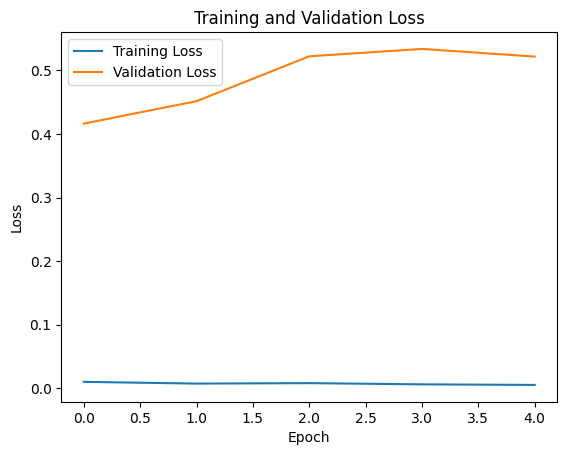

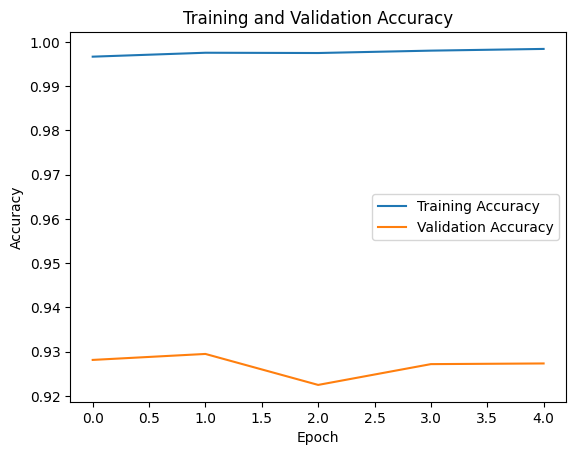

625/625 [==============================] - 12s 20ms/step - loss: 0.5217 - accuracy: 0.9273
Test Loss: 0.5217
Test Accuracy: 0.9273
625/625 [==============================] - 13s 20ms/step
Confusion Matrix:
[[9407  671]
 [ 782 9140]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10078
           1       0.93      0.92      0.93      9922

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000

F1 Score: 0.9264


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Compute classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_classes))

# Compute F1 score
f1 = f1_score(y_test, y_pred_classes)
print(f'F1 Score: {f1:.4f}')
